In [47]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [48]:
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementNotVisibleException
from selenium import webdriver

In [49]:
import re
import pickle
from nltk.corpus import stopwords # Import the stop word list
from nltk.stem import PorterStemmer

In [4]:
url = 'https://www.imdb.com/title/tt8239946/reviews?ref_=tt_urv'

In [5]:
page = requests.get(url)
page

<Response [200]>

In [6]:
ip = []
tumbbad_reviews = []

In [7]:
soup = BeautifulSoup(page.content,'html.parser')
soup


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///title/tt8239946?src=mdot" name="apple-itunes-app"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Tumbbad (2018) - Tumbbad (2018) - User Reviews - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>


In [56]:
reviews = soup.findAll("div",attrs={"class"})
reviews

[]

In [9]:
for i in range(len(reviews)):
    ip.append(reviews[i].text)
    tumbbad_reviews = tumbbad_reviews+ip

In [10]:
tumbbad_reviews

['We dont deserve movies like Tumbbad. There is no khan in this movie, no item songs, and no big stars. Do yourself a favor by watching #Tumbbad this week. Brilliant direction and breathtaking cinematography. Breaks my heart to see an empty theater on day 2. Contribute to meaningful cinema by watching it in theaters or keep complaining about movies like race3.#TumbbadWinningHearts',
 'We dont deserve movies like Tumbbad. There is no khan in this movie, no item songs, and no big stars. Do yourself a favor by watching #Tumbbad this week. Brilliant direction and breathtaking cinematography. Breaks my heart to see an empty theater on day 2. Contribute to meaningful cinema by watching it in theaters or keep complaining about movies like race3.#TumbbadWinningHearts',
 "TumbbadWith this movie , indian film making has definitely gained a certain level of maturity . I have lost my faith in horror cum thriller zone movies which are produced in india, in past all they do is cut copy paste. This m

In [11]:
len(tumbbad_reviews)

325

In [12]:
import re

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

In [13]:
preprocess_reviews(tumbbad_reviews)

['we dont deserve movies like tumbbad there is no khan in this movie no item songs and no big stars do yourself a favor by watching #tumbbad this week brilliant direction and breathtaking cinematography breaks my heart to see an empty theater on day 2 contribute to meaningful cinema by watching it in theaters or keep complaining about movies like race3#tumbbadwinninghearts',
 'we dont deserve movies like tumbbad there is no khan in this movie no item songs and no big stars do yourself a favor by watching #tumbbad this week brilliant direction and breathtaking cinematography breaks my heart to see an empty theater on day 2 contribute to meaningful cinema by watching it in theaters or keep complaining about movies like race3#tumbbadwinninghearts',
 'tumbbadwith this movie  indian film making has definitely gained a certain level of maturity  i have lost my faith in horror cum thriller zone movies which are produced in india in past all they do is cut copy paste this movie is definitely o

In [14]:
tumbbad_reviews[0:149]

['We dont deserve movies like Tumbbad. There is no khan in this movie, no item songs, and no big stars. Do yourself a favor by watching #Tumbbad this week. Brilliant direction and breathtaking cinematography. Breaks my heart to see an empty theater on day 2. Contribute to meaningful cinema by watching it in theaters or keep complaining about movies like race3.#TumbbadWinningHearts',
 'We dont deserve movies like Tumbbad. There is no khan in this movie, no item songs, and no big stars. Do yourself a favor by watching #Tumbbad this week. Brilliant direction and breathtaking cinematography. Breaks my heart to see an empty theater on day 2. Contribute to meaningful cinema by watching it in theaters or keep complaining about movies like race3.#TumbbadWinningHearts',
 "TumbbadWith this movie , indian film making has definitely gained a certain level of maturity . I have lost my faith in horror cum thriller zone movies which are produced in india, in past all they do is cut copy paste. This m

In [15]:
Tumbbad_reviews = pd.DataFrame(data=tumbbad_reviews)
Tumbbad_reviews.iloc[15]

0    We dont deserve movies like Tumbbad. There is ...
Name: 15, dtype: object

In [16]:
# writing reviews in a text file 
with open("tumbbad_reviews.txt","w",encoding='utf8') as output:
    output.write(str(tumbbad_reviews))

In [17]:
 # Joinining all the reviews into single paragraph 

tumbbad_reviews_string = ' '.join(tumbbad_reviews)

In [18]:
# Removing unwanted symbols incase if exists

tumbbad_reviews_string = re.sub("[^A-Za-z" "]+"," ",tumbbad_reviews_string).lower()
tumbbad_reviews_string = re.sub("[0-9" "]+"," ",tumbbad_reviews_string)

In [19]:
tumbbad_reviews_string

'we dont deserve movies like tumbbad there is no khan in this movie no item songs and no big stars do yourself a favor by watching tumbbad this week brilliant direction and breathtaking cinematography breaks my heart to see an empty theater on day contribute to meaningful cinema by watching it in theaters or keep complaining about movies like race tumbbadwinninghearts we dont deserve movies like tumbbad there is no khan in this movie no item songs and no big stars do yourself a favor by watching tumbbad this week brilliant direction and breathtaking cinematography breaks my heart to see an empty theater on day contribute to meaningful cinema by watching it in theaters or keep complaining about movies like race tumbbadwinninghearts tumbbadwith this movie indian film making has definitely gained a certain level of maturity i have lost my faith in horror cum thriller zone movies which are produced in india in past all they do is cut copy paste this movie is definitely original they do not

In [20]:
# words that contained in tumbbad reviews

tumbbad_reviews_words = tumbbad_reviews_string.split(' ')

tumbbad_reviews_words

['we',
 'dont',
 'deserve',
 'movies',
 'like',
 'tumbbad',
 'there',
 'is',
 'no',
 'khan',
 'in',
 'this',
 'movie',
 'no',
 'item',
 'songs',
 'and',
 'no',
 'big',
 'stars',
 'do',
 'yourself',
 'a',
 'favor',
 'by',
 'watching',
 'tumbbad',
 'this',
 'week',
 'brilliant',
 'direction',
 'and',
 'breathtaking',
 'cinematography',
 'breaks',
 'my',
 'heart',
 'to',
 'see',
 'an',
 'empty',
 'theater',
 'on',
 'day',
 'contribute',
 'to',
 'meaningful',
 'cinema',
 'by',
 'watching',
 'it',
 'in',
 'theaters',
 'or',
 'keep',
 'complaining',
 'about',
 'movies',
 'like',
 'race',
 'tumbbadwinninghearts',
 'we',
 'dont',
 'deserve',
 'movies',
 'like',
 'tumbbad',
 'there',
 'is',
 'no',
 'khan',
 'in',
 'this',
 'movie',
 'no',
 'item',
 'songs',
 'and',
 'no',
 'big',
 'stars',
 'do',
 'yourself',
 'a',
 'favor',
 'by',
 'watching',
 'tumbbad',
 'this',
 'week',
 'brilliant',
 'direction',
 'and',
 'breathtaking',
 'cinematography',
 'breaks',
 'my',
 'heart',
 'to',
 'see',
 'an',


In [21]:
stop_words = stopwords.words('english')

In [22]:
with open(r'C:\Users\abhis\OneDrive\Desktop\DATA SCIENCE\ExcelR\Assignments\Problem statements - ExcelR\Text Mining\stop.txt') as sw:
    stopwords = sw.read()
    

In [23]:
stopwords = stopwords.split('\n')

In [24]:
tumbbad_reviews_words = [w for w in tumbbad_reviews_words if not w in stopwords]
tumbbad_reviews_words 

['dont',
 'deserve',
 'movies',
 'tumbbad',
 'khan',
 'movie',
 'item',
 'songs',
 'big',
 'stars',
 'favor',
 'watching',
 'tumbbad',
 'week',
 'brilliant',
 'direction',
 'breathtaking',
 'cinematography',
 'breaks',
 'heart',
 'empty',
 'theater',
 'day',
 'contribute',
 'meaningful',
 'cinema',
 'watching',
 'theaters',
 'complaining',
 'movies',
 'race',
 'tumbbadwinninghearts',
 'dont',
 'deserve',
 'movies',
 'tumbbad',
 'khan',
 'movie',
 'item',
 'songs',
 'big',
 'stars',
 'favor',
 'watching',
 'tumbbad',
 'week',
 'brilliant',
 'direction',
 'breathtaking',
 'cinematography',
 'breaks',
 'heart',
 'empty',
 'theater',
 'day',
 'contribute',
 'meaningful',
 'cinema',
 'watching',
 'theaters',
 'complaining',
 'movies',
 'race',
 'tumbbadwinninghearts',
 'tumbbadwith',
 'movie',
 'indian',
 'film',
 'making',
 'gained',
 'level',
 'maturity',
 'lost',
 'faith',
 'horror',
 'cum',
 'thriller',
 'zone',
 'movies',
 'produced',
 'india',
 'past',
 'cut',
 'copy',
 'paste',
 'mov

In [25]:
# Joinining all the reviews into single paragraph 

tumbbad_reviews_string = ' '.join(tumbbad_reviews)
tumbbad_reviews_string 

'We dont deserve movies like Tumbbad. There is no khan in this movie, no item songs, and no big stars. Do yourself a favor by watching #Tumbbad this week. Brilliant direction and breathtaking cinematography. Breaks my heart to see an empty theater on day 2. Contribute to meaningful cinema by watching it in theaters or keep complaining about movies like race3.#TumbbadWinningHearts We dont deserve movies like Tumbbad. There is no khan in this movie, no item songs, and no big stars. Do yourself a favor by watching #Tumbbad this week. Brilliant direction and breathtaking cinematography. Breaks my heart to see an empty theater on day 2. Contribute to meaningful cinema by watching it in theaters or keep complaining about movies like race3.#TumbbadWinningHearts TumbbadWith this movie , indian film making has definitely gained a certain level of maturity . I have lost my faith in horror cum thriller zone movies which are produced in india, in past all they do is cut copy paste. This movie is d

In [26]:
#tumbbad_reviews_string  = tumbbad_reviews_string.split

In [27]:
# We will now perform the word cloud

from wordcloud import WordCloud

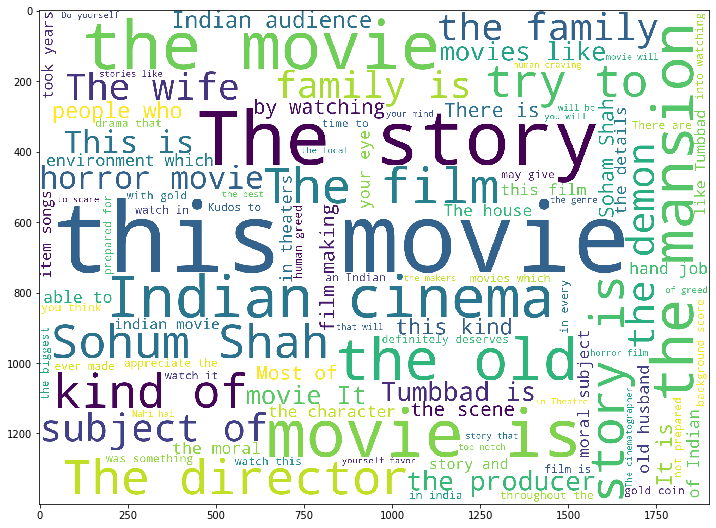

In [28]:
wordcloud_imdb = WordCloud(font_path=None,
    width=1900,
    height=1400,
    max_words=100,                  
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='white').generate(tumbbad_reviews_string)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud_imdb)


In [29]:
# Postive Words

with open(r'C:\Users\abhis\OneDrive\Desktop\DATA SCIENCE\ExcelR\Assignments\Problem statements - ExcelR\Text Mining\positive-words.txt') as pos:
    postive_words = pos.read().split('\n')

In [30]:
postive_words = postive_words[36:]
postive_words

['abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'affordabl

In [31]:
# Negative Words

with open(r'C:\Users\abhis\OneDrive\Desktop\DATA SCIENCE\ExcelR\Assignments\Problem statements - ExcelR\Text Mining\negative-words.txt') as neg:
    Negative_words = neg.read().split('\n')

In [32]:
Negative_words = Negative_words[37:]
Negative_words

['abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',
 'afraid',
 'aggravate',

In [33]:
# Negative Wordcloud

Negative_word_String = ' '.join([w for w in tumbbad_reviews_words if w in Negative_words ])

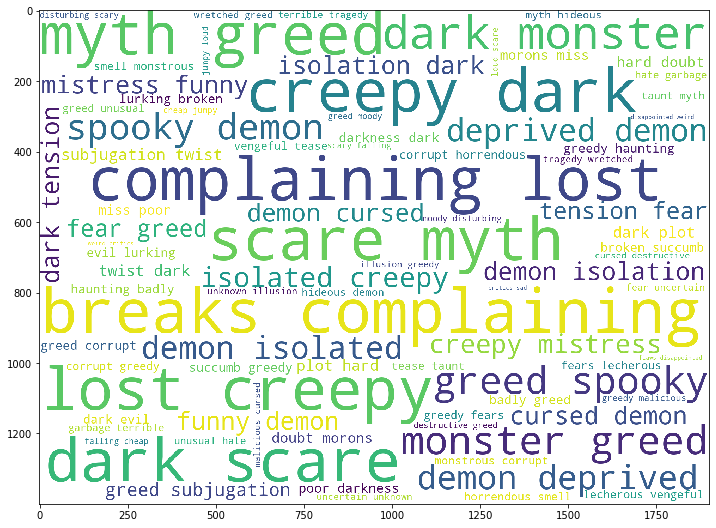

In [34]:
Neg_wordcloud = WordCloud(font_path=None,
    width=1900,
    height=1400,
    max_words=100,                  
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='white').generate(Negative_word_String)

plt.figure(figsize=(12,12))
plt.imshow(Neg_wordcloud)

In [35]:
# Postive wordcloud

Postive_word_string = ' '.join([w for w in tumbbad_reviews_words if w in postive_words] )

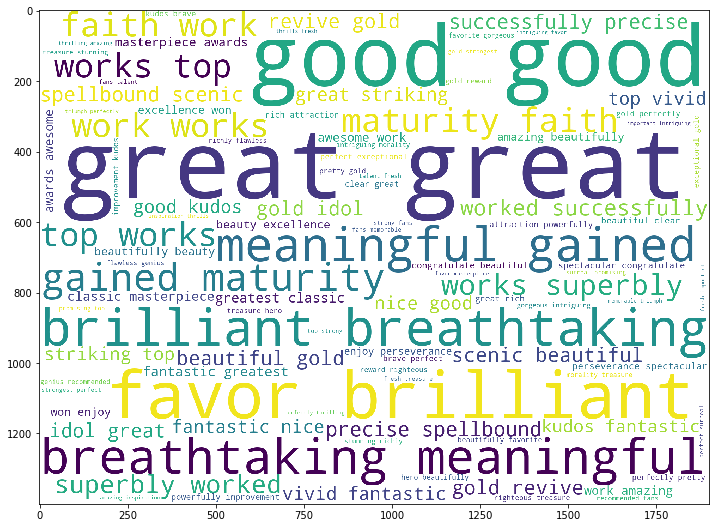

In [36]:
Pos_wordcloud = WordCloud(font_path=None,
    width=1900,
    height=1400,
    max_words=100,                  
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='white').generate(Postive_word_string)

plt.figure(figsize=(12,12))
plt.imshow(Pos_wordcloud)

In [37]:
df = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\DATA SCIENCE\ExcelR\Assignments\Machine Learning - ExcelR\8. Text Mining\TM\tumbbad.csv')

In [38]:
from textblob import TextBlob

In [55]:
import csv
from textblob import TextBlob
with open(r'C:\Users\abhis\OneDrive\Desktop\DATA SCIENCE\ExcelR\Assignments\Machine Learning - ExcelR\8. Text Mining\TM\tumbbad.csv') as scrape_file:
    review = csv.reader(scrape_file, delimiter=',', quotechar='"')
    for row in review:
        row = str([cell.encode('utf-8') for cell in row])
        print(row)
        blob = TextBlob(row)
        print(blob.sentiment_assessments)
        
    

    

[b'Review']
Sentiment(polarity=0.0, subjectivity=0.0, assessments=[])
[b'We dont deserve movies like Tumbbad. There is no khan in this movie, no item songs, and no big stars. Do yourself a favor by watching #Tumbbad this week. Brilliant direction and breathtaking cinematography. Breaks my heart to see an empty theater on day 2. Contribute to meaningful cinema by watching it in theaters or keep complaining about movies like race3.#TumbbadWinningHearts']
Sentiment(polarity=0.45999999999999996, subjectivity=0.62, assessments=[(['no', 'big'], -0.0, 0.1, None), (['brilliant'], 0.9, 1.0, None), (['breathtaking'], 1.0, 1.0, None), (['empty'], -0.1, 0.5, None), (['meaningful'], 0.5, 0.5, None)])
[b'We dont deserve movies like Tumbbad. There is no khan in this movie, no item songs, and no big stars. Do yourself a favor by watching #Tumbbad this week. Brilliant direction and breathtaking cinematography. Breaks my heart to see an empty theater on day 2. Contribute to meaningful cinema by watching

[b"This movie is way different than any horror movie ever made in india...it is a perfect blend of mythology, greet, desi atmosphere with exceptional horror.\nThe story setup here is that there is an evil god lurking deep below a broken-down colonial estate located in the rural village of Tumbbad, who has spent an eternity protecting an infinite stash of gold from those who succumb to their own greedy desires.While it could use a little tightening in terms of its story, Tumbbad is a haunting and timeless exploration of just how badly greed can corrupt any of us, and we see that perfectly embodied in Vinayak's journey throughout the film, where he makes some pretty horrendous decisions because of his need to posture as a respected figure in his small community."]
Sentiment(polarity=0.055654761904761915, subjectivity=0.6904761904761905, assessments=[(['different'], 0.0, 0.6, None), (['perfect'], 1.0, 1.0, None), (['exceptional'], 0.6666666666666666, 1.0, None), (['evil'], -1.0, 1.0, None

[b'Finally its here!!! An Indian horror movie with an Indian story and an Indian soul. It has the smell of wet soil..it has the dampness of old house covered with moulds. There are no castles and occulists performing exorcism on white eyed monstrous girl.\nInstead there is a corrupt feudal lord who exploits a widow, bribing her with gold coins. But when its time to reward her, all he says is"swarn mudra kamaani padti hai." You realise the truth of this statement later in the movie.\nInstead of righteous protagonist, we have Vinayak who is greedy for wealth which he feels belongs to him. But then he is told, "Virasat mein mili har cheez par dawa nahi karte." He craves for the treasure and fights his fears and finally reaches to it. And boy!!! Once you see how he earns it..you will feel he definitely deserves it. \nNow for the acting part...Sohum Shah absolutely nailed the role of Vinayak. He has very few dialogues but his eyes do the talking. From lecherous to vengeful in a flash.\nAnd 

Sentiment(polarity=0.18304924242424245, subjectivity=0.5312900641025641, assessments=[(['beautiful'], 0.85, 1.0, None), (['unique'], 0.375, 1.0, None), (['moral'], 0.0, 0.25, None), (['subject'], -0.16666666666666666, 0.3333333333333333, None), (['human'], 0.0, 0.1, None), (['able'], 0.5, 0.625, None), (['creepy'], -0.5, 1.0, None), (['huge'], 0.4000000000000001, 0.9, None), (['big'], 0.0, 0.1, None), (['only'], 0.0, 1.0, None), (['old'], 0.1, 0.2, None), (['everyday'], -0.2, 0.6, None), (['old'], 0.1, 0.2, None), (['funny'], 0.25, 1.0, None), (['near'], 0.1, 0.4, None), (['great'], 0.8, 0.75, None), (['great'], 0.8, 0.75, None), (['old'], 0.1, 0.2, None), (['live'], 0.13636363636363635, 0.5, None), (['old'], 0.1, 0.2, None), (['regularly'], 0.0, 0.07692307692307693, None), (['striking'], 0.5, 1.0, None), (['top'], 0.5, 0.5, None), (['own'], 0.6, 1.0, None), (['very'], 0.2, 0.3, None), (['especially'], 0.0, 1.0, None), (['constant'], 0.0, 0.3333333333333333, None), (['vivid'], 0.125, 0

In [51]:
import nltk

In [52]:
freq = nltk.FreqDist(tumbbad_reviews_words)

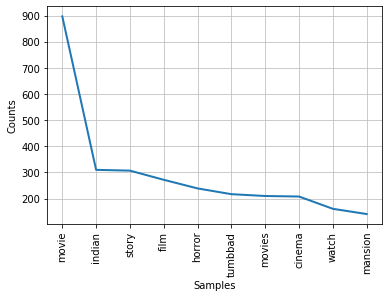

In [54]:
freq.plot(10)